<a href="https://colab.research.google.com/github/manisha-dhanuka/Linear-Regression/blob/main/yes_bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing various packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing required functions/modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [3]:
#Loading the data file
stock_price = pd.read_csv("/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv",date_parser = 'Date')

In [4]:
# overview of the data
stock_price.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [6]:
#Checking for non-null values:
stock_price.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
#Checking for Duplicate values:
stock_price.duplicated().sum()

0

#Observation:
Thus this dataset contains neither  null values nor duplicate rows

In [8]:
#Changing index to Date
stock_price = stock_price.set_index('Date')

In [9]:
stock_price

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30
Oct-05,13.20,14.47,12.40,12.99
Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...
Jul-20,25.60,28.30,11.10,11.95
Aug-20,12.00,17.16,11.85,14.37
Sep-20,14.30,15.34,12.75,13.15


# Observation 1:
From the Below jointplots it seems that all the independent variables are in linear relationship with the dependent values.

This checks the first assumption of Linear Regression Model.

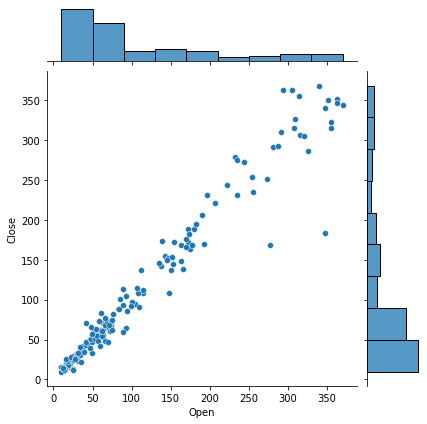

In [10]:
# Checking relation between independent variables individually:
# Plotting Close against Open values:
sns.jointplot(data = stock_price, x='Open', y= 'Close');


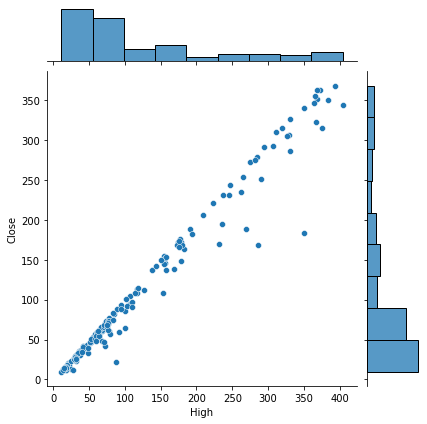

In [11]:
# Plotting Close against High values:
sns.jointplot(data = stock_price, x='High', y= 'Close');

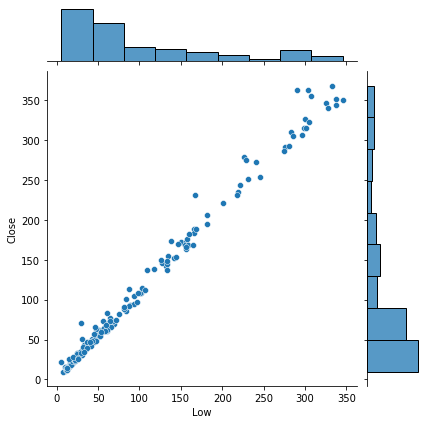

In [12]:
# Plotting Close against Low values:
sns.jointplot(data = stock_price, x='Low', y= 'Close');

# Observation 2:

From the correlation matrix and heatmap, it seems that the multicollinearity condition is there in between independent variables. First, we will calculate the  Variance of inflation to check if it is making a big difference or not.


In [13]:
corr_matrix = stock_price.corr()

In [14]:
print(corr_matrix)

           Open      High       Low     Close
Open   1.000000  0.993040  0.983978  0.977971
High   0.993040  1.000000  0.983422  0.985051
Low    0.983978  0.983422  1.000000  0.995358
Close  0.977971  0.985051  0.995358  1.000000


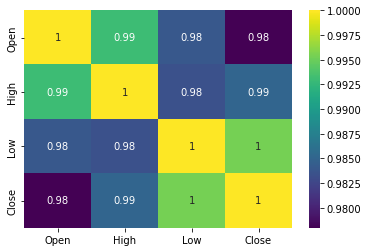

In [15]:
# Visualising correlation between the variables:
sns.heatmap(corr_matrix, cmap = 'viridis',annot = True);

The Data seems highly correlated ....We gonna find the variance inflation Factor and then do the need.


In [16]:
# Importing vif  and defining the function for finding vif for all variables except output Label:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns[:-1]
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1]-1)]

    return(vif)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
calc_vif(stock_price)

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257


The VIF values are very large...we will drop High and Low columns.

In [18]:
stock_price = stock_price.drop(['High', 'Low'], axis = 1)

In [19]:
stock_price

,Open,Close
Date,,
Jul-05,13.00,12.46
Aug-05,12.58,13.42
Sep-05,13.48,13.30
Oct-05,13.20,12.99
Nov-05,13.35,13.41
...,...,...
Jul-20,25.60,11.95
Aug-20,12.00,14.37
Sep-20,14.30,13.15


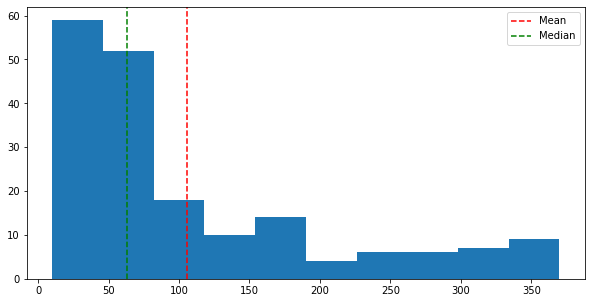

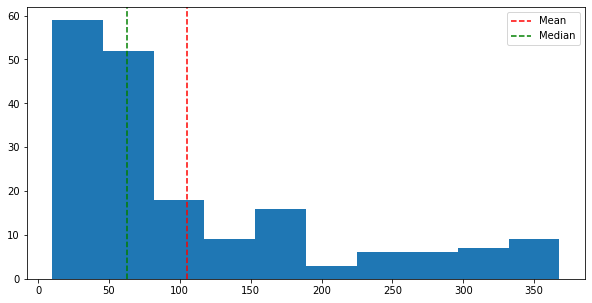

In [22]:
# Univariate Analysis:
for col in stock_price.columns:
  fig = plt.figure(figsize=(10,5))
  ax = plt.gca()
  ax.hist(stock_price[col] )
  ax.axvline(stock_price[col].mean(),color = 'red',linestyle = 'dashed',label = 'Mean')
  ax.axvline(stock_price[col].median(),color = 'green',linestyle = 'dashed',label = 'Median')
  ax.legend()

Since the data is positively skewed, we gonna try to apply log transform and see if it still remains skewed or problem is solved

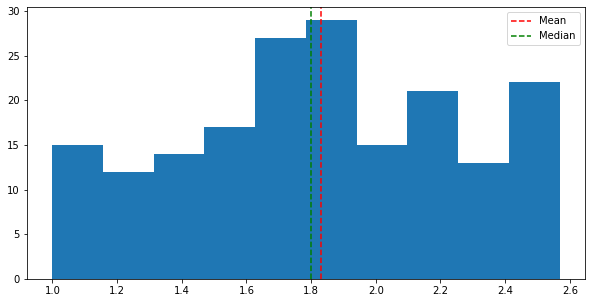

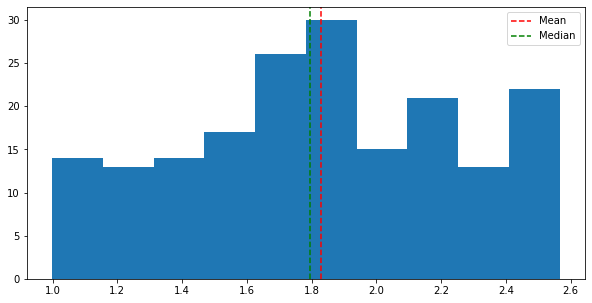

In [27]:
# Univariate Analysis:
for col in stock_price.columns:
  fig = plt.figure(figsize=(10,5))
  ax = plt.gca()
  ax.hist(np.log10(stock_price[col]))
  ax.axvline(np.log10(stock_price[col]).mean(),color = 'red',linestyle = 'dashed',label = 'Mean')
  ax.axvline(np.log10(stock_price[col]).median(),color = 'green',linestyle = 'dashed',label = 'Median')
  ax.legend()

Applying Log transformation solves the problem of skewness. So, we gonna go ahead with the log values.


In [28]:
#Updating the data with log values:
for col in stock_price.columns:
  stock_price[col] = np.log10(stock_price[col])

In [29]:
stock_price

,Open,Close
Date,,
Jul-05,1.113943,1.095518
Aug-05,1.099681,1.127753
Sep-05,1.129690,1.123852
Oct-05,1.120574,1.113609
Nov-05,1.125481,1.127429
...,...,...
Jul-20,1.408240,1.077368
Aug-20,1.079181,1.157457
Sep-20,1.155336,1.118926


# Data Preprocessing And Model creation:

In [30]:
# Creating independent and dependent values dataframe:
X = stock_price.drop('Close', axis=1)
y = stock_price["Close"]
dependent_variable= ['Close']
independent_variables = list(X.columns)

In [31]:
# Splitting the Data into train and test Data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
# Normalising the independent variables using Min Max Scaler :
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Creating Linear Regression Model:
regress= LinearRegression()

In [34]:
# Fitting the train Data into the model:
regress.fit(X_train,y_train)

LinearRegression()

In [35]:
# The coefficient values for the best fit line :
regress.coef_

array([1.57390542])

In [36]:
# The intercept value for the best fit line :
regress.intercept_

0.9970743304334672

# Best Fit line gives the predicted Values as:


## predicted_close = ( 1.57390542* Open ) + 0.9970743304334672

# Predicting Values:

In [38]:
#Predicting Values
predicted_train = regress.predict(X_train)
predicted_test = regress.predict(X_test)

In [39]:
print(predicted_test)

[1.47884513 1.18187427 2.5341809  2.05053688 2.501582   1.27177566
 1.55517882 1.71436547 2.21318114 1.69158217 1.81962981 2.29629727
 1.79237779 1.59142713 0.99881441 1.35632446 1.61423108 1.4933241
 1.84776153 1.67899889 2.44485471 2.18248582 2.54805992 1.69852562
 1.31124769 2.16270996 1.72851174 1.43643348 1.77443738 2.15384244
 1.73054198 1.68980664 2.24963347 2.40605665 1.79921378 1.66604153
 1.54562535 1.79096941 1.72401166 1.70621775 1.20194438 1.09083931
 2.40878306 1.97005251 2.55250782 1.78184646 2.0318672  1.42482624
 2.22947309 1.96629481 1.79378162 2.25695953 1.12724079 2.38956233
 1.20030672 1.84527781 2.54431835 1.8635696  2.49950468 1.57205104
 2.54331514 1.34665909]


In [40]:
print(y_test)

Date
Feb-07    1.456821
Jan-09    1.087781
Jul-18    2.565730
Oct-14    2.136181
Nov-17    2.486855
            ...   
Aug-12    1.819346
Jan-18    2.549555
Sep-07    1.616581
Sep-18    2.263518
Apr-20    1.446382
Name: Close, Length: 62, dtype: float64


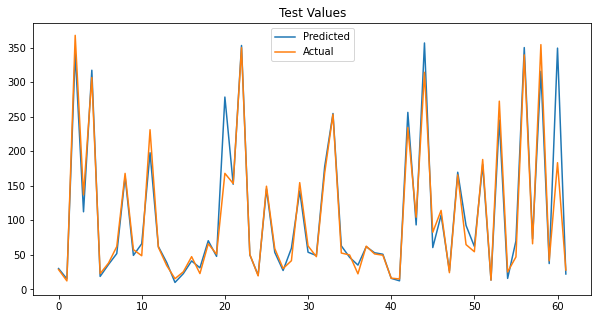

In [54]:
# Plotting test values:
plt.figure(figsize=(10,5))
plt.plot(10**(predicted_test))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.title("Test Values")
plt.show()

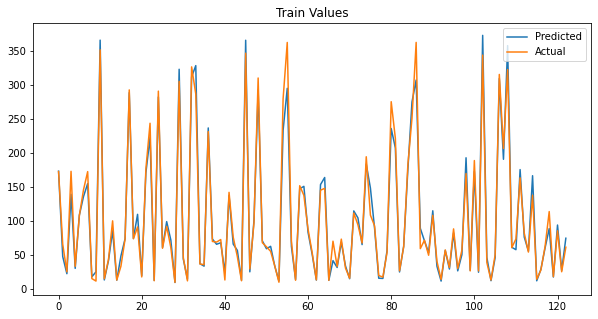

In [55]:
# Plotting train values:
plt.figure(figsize=(10,5))
plt.plot(10**(predicted_train))
plt.plot(np.array(10**(y_train)))
plt.legend(["Predicted","Actual"])
plt.title("Train Values")
plt.show()

# Evaluation of the model:

In [43]:
print(f"Mean  of y values : {(10**y).mean()} \nMean of predicted Train Values: {(10**predicted_train).mean()} \nMean of predicted Test Values: {(10**predicted_test).mean()}")

Mean  of y values : 105.2047027027027 
Mean of predicted Train Values: 104.15818240180741 
Mean of predicted Test Values: 109.34043599023005


In [46]:
# Evaluating Train Values:
#Mean Absolute error:
MAE_train = mean_absolute_error(10**y_train, 10**predicted_train)

# Mean squared Error:
MSE_train = mean_squared_error( 10**y_train, 10**predicted_train)

# Root mean squared error:
RMSE_train = np.sqrt(mean_squared_error( 10**y_train, 10**predicted_train))

# R2_score
r2_train = r2_score(10**y_train, 10**predicted_train)

In [47]:
# Evaluating Test Values:
#Mean Absolute error:
MAE_test = mean_absolute_error( 10**y_test, 10**predicted_test)

# Mean squared Error:
MSE_test = mean_squared_error(10**y_test, 10**predicted_test )

# Root mean squared error:
RMSE_test = np.sqrt(mean_squared_error(10**y_test, 10**predicted_test ))

# R2_score
r2_test = r2_score(10**y_test, 10**predicted_test)

# Comparing Errors of predicted Train and predicted Test Values:

After seeing error_df, it seems that error in Train Data is less in comparison to Test Data


In [48]:
error_df = pd.DataFrame(index = [' Predicted Train','Predicted Test'], data = {'Mean Absolute Error': [MAE_train, MAE_test], 'Mean Squared Error':[MSE_train, MSE_test] ,'Root Mean Squared Error': [RMSE_train, RMSE_test],'R2 Score': [r2_train, r2_test]})

In [49]:
error_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Predicted Train,9.602030,236.257706,15.370677,0.975052
Predicted Test,13.539234,820.791648,28.649462,0.918372


#Error Observations:
 Predicted Train MSE error seems almost one-fourth of the predicted Test Error..So, there could be a chance of Overfitting. We will try using Ridge Regression for removing overfitting.

# All about the Residuals:

In [56]:
# Train Residuals:
train_residuals = 10**y_train - 10**predicted_train
train_residuals.mean()

0.8297850778673994

In [57]:
# Test Residuals:
test_residuals = 10**y_test - 10**predicted_test
test_residuals.mean()

-3.705758570875198

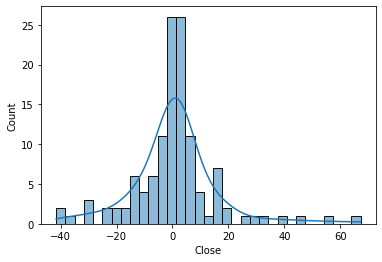

In [58]:
# Checking the residual Distribution for Train Data: 

sns.histplot(train_residuals ,kde = True)

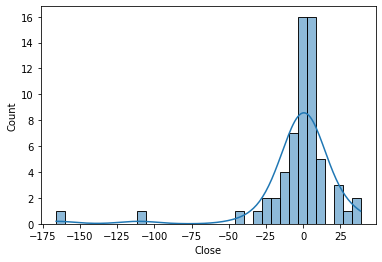

In [59]:
# Checking the residual Distribution for Test Data: 

sns.histplot(test_residuals ,kde = True)

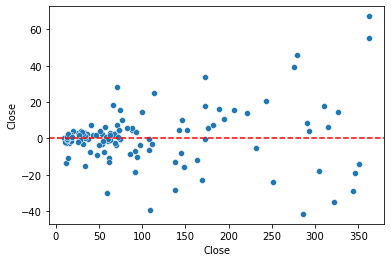

In [60]:
# Checking for heteroscedasity in Train Data:
sns.scatterplot(x= 10**y_train, y= train_residuals)
plt.axhline(y=0, color = 'red',linestyle = 'dashed')

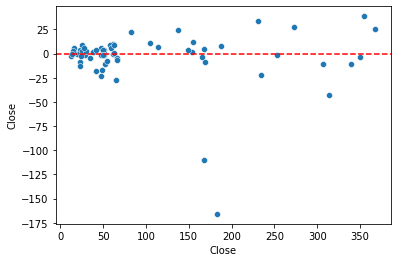

In [61]:
# Checking for heteroscedasity in Test Data:
sns.scatterplot(x= 10**y_test, y= test_residuals)
plt.axhline(y=0, color = 'red',linestyle = 'dashed')

There seems Heteroscedasticity in  the residual plot. Let us try doing polynomial fit first.


In [62]:
# Importing Polynomial Features:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
polynomial_converter = PolynomialFeatures(degree = 3,include_bias = False)
polynomial_converter.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [68]:
poly_features = polynomial_converter.transform(X)

In [69]:
poly_features[0]

array([1.11394335, 1.24086979, 1.38225866])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)

In [72]:
#Creating Linear Regression Model on the 3 degree polynomial features:
poly_model = LinearRegression()

In [73]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [76]:
poly_model.coef_

array([ 0.70215078,  0.16771565, -0.02995263])

In [77]:
poly_model.intercept_

0.16626883965926242

In [78]:
poly_predicted_train = poly_model.predict(X_train)
poly_predicted_test = poly_model.predict(X_test)

In [79]:
# Evaluating Train Values:
#Mean Absolute error:
MAE_train = mean_absolute_error(10**y_train, 10**poly_predicted_train)

# Mean squared Error:
MSE_train = mean_squared_error( 10**y_train, 10**poly_predicted_train)

# Root mean squared error:
RMSE_train = np.sqrt(mean_squared_error( 10**y_train, 10**poly_predicted_train))

# R2_score
r2_train = r2_score(10**y_train, 10**poly_predicted_train)

In [80]:
# Evaluating Test Values:
#Mean Absolute error:
MAE_test = mean_absolute_error( 10**y_test, 10**poly_predicted_test)

# Mean squared Error:
MSE_test = mean_squared_error(10**y_test, 10**poly_predicted_test )

# Root mean squared error:
RMSE_test = np.sqrt(mean_squared_error(10**y_test, 10**poly_predicted_test ))

# R2_score
r2_test = r2_score(10**y_test, 10**poly_predicted_test)

In [81]:
error_df = pd.DataFrame(index = [' Predicted Train','Predicted Test'], data = {'Mean Absolute Error': [MAE_train, MAE_test], 'Mean Squared Error':[MSE_train, MSE_test] ,'Root Mean Squared Error': [RMSE_train, RMSE_test],'R2 Score': [r2_train, r2_test]})

In [82]:
error_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score
Predicted Train,9.530129,232.220417,15.238780,0.975478
Predicted Test,13.407368,810.824094,28.474973,0.919363


In [83]:
# Train Residuals:
poly_train_residuals = 10**y_train - 10**poly_predicted_train
poly_train_residuals.mean()

0.788561389919309

In [86]:
# Test Residuals:
poly_test_residuals = 10**y_test - 10**poly_predicted_test
poly_test_residuals.mean()

-3.6420717792009367

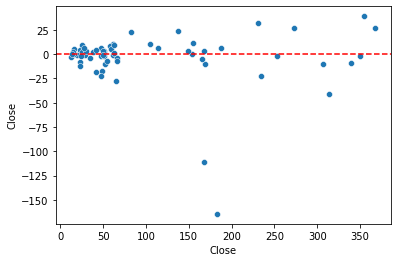

In [87]:
# Checking for heteroscedasity in Test Data:
sns.scatterplot(x= 10**y_test, y= test_residuals)
plt.axhline(y=0, color = 'red',linestyle = 'dashed')

Thus, Polynomial Fit Model doesn't make that much difference to the model. Let us try doing Ridge Regression.

In [ ]:
help(RidgeCV)

In [ ]:
 # Importing Ridge Regressor CV and defining the regressor:
 from sklearn.linear_model import RidgeCV

alpha = [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]
ridge_regressor = RidgeCV(alphas = alpha, fit_intercept= True, scoring  = 'neg_mean_squared_error', cv = 3)

In [ ]:
#Fitting the Train data :
ridge_regressor.fit(X_train, y_train)

RidgeCV(alphas=array([1.0e-15, 1.0e-13, 1.0e-10, 1.0e-08, 1.0e-05, 1.0e-04, 1.0e-03,
       1.0e-02, 1.0e-01, 1.0e+00, 5.0e+00, 1.0e+01, 2.0e+01, 3.0e+01,
       4.0e+01, 4.5e+01, 5.0e+01, 5.5e+01, 6.0e+01, 1.0e+02]),
        cv=3, scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

AttributeError: ignored